#Customer Segmentation
Supervised learning of survey data from employee human resource management database; returns predition of employee attrition rate

Expected input:   --> 

    1) dataframe --> employee retention survey data
    
Expected output: 
 


    1) list(s) --> attrition prediction 


What is needed:


1.  identify employees most likely to leave using linear regression

3.  adjust the business strategy to cater to the concerns of the identified employees considering business constraints to increase retention and decrease attrition



###Development Team:


*   Jeannine Proctor, PM and Product Owner



This project aims to discover insights to help companies make conscious decisions about hiring talents and improve employee satisfaction and retention. The report will go through exploratory data analysis and preparation, using machine learning to drive decision-making.

Methodology

The dataset used for this predictive modeling project was derived from the [IBM HR Analytics dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset). The dataset contains information about past and current employees. It includes employee characteristics such as gender, seniority, department, job role, salary, and performance ratings.

The dataset will first be explored to determine the patterns in the data, identify missing values and outliers, explore the feature distributions, and find potential relationships and correlations. After that, the features will be prepared for modeling. The models will be evaluated

Results

The model was able to predict employee attrition with 83.7% accuracy using Logistic Regression. This result was validated using a 10-fold cross-validation, and the ROC AUC score was 0.84. The main predictors of attrition were Education in their Field and Overtime. The model also indicated that the current promotion rate and the satisfaction level were the next two most important factors when predicting employee attrition.

Conclusion

This predictive modeling project provided insights into the patterns of employee attrition in the IBM HR Analytics dataset. The results of the model can help companies make conscious decisions about hiring and improve employee satisfaction and retention. Future work should focus on more sophisticated models, more features, and larger datasets.

##Import Libraries

In [1]:
#Importing the Libraries
# basic operations
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import datetime as dt
import io
import sys
import itertools
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# visualizations
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns

#Setting up colors prefrences
sns.set_theme(style="darkgrid")
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# machine learning
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, classification_report, average_precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import KElbowVisualizer


##Load data

In [2]:
#Loading the dataset
data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

print(data.shape)
data.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Observations:

Retention Information -->

Education
1.  'Below College'
2.  'College'
3.  'Bachelor'
4.  'Master'
5.  'Doctor'

EnvironmentSatisfaction
1.  'Low'
2.  'Medium'
3.  'High'
4.  'Very High'

JobInvolvement
1.  'Low'
2.  'Medium'
3.  'High'
4.  'Very High'

JobSatisfaction
1.  'Low'
2.  'Medium'
3.  'High'
4.  'Very High'

PerformanceRating
1.  'Low'
2.  'Good'
3.  'Excellent'
4.  'Outstanding'

RelationshipSatisfaction
1.  'Low'
2.  'Medium'
3.  'High'
4.  'Very High'

WorkLifeBalance
1.  'Bad'
2.  'Good'
3.  'Better'
4.  'Best'


##EDA & Data Cleaning




*   Exploring Data
*   Data Cleaning
*   Feature Engineering



In [ ]:
# exploring features
data.info()

In [4]:
# Changing binary representation of our target variable to 1/0
data.Attrition = data.Attrition.map({'Yes':1, 'No':0})


In [5]:
# show size of dataset
data.size

51450

In [ ]:
# Check for duplicated values in dataset
data.duplicated()

Observations:
From the above output, we can conclude and note that:

*  The dataset has 35 columns with 1470 unique entries. 
*  There is no invalid data or duplicates in the dataset, making it more usable.
  

Note: there are no non-null values.

Evaluate data descriptive statistics with new features

In [7]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations:

*   The mean age of the employees documented in the dataset is 36.92.
*   The average EnvironmentSatisfation rating is 2.72; the average hourly rate is 65.89.


To look at the broader view, plot selected features.

In [8]:
# #To plot some selected features 
# #Plotting following features
# To_Plot = [ "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]
# print("Reletive Plot Of Some Selected Features: A Data Subset")
# plt.figure()
# sns.pairplot(data[To_Plot], hue=data.attrition, palette= (["#682F2F","#F3AB60"]))
# #Taking hue 
# plt.show()



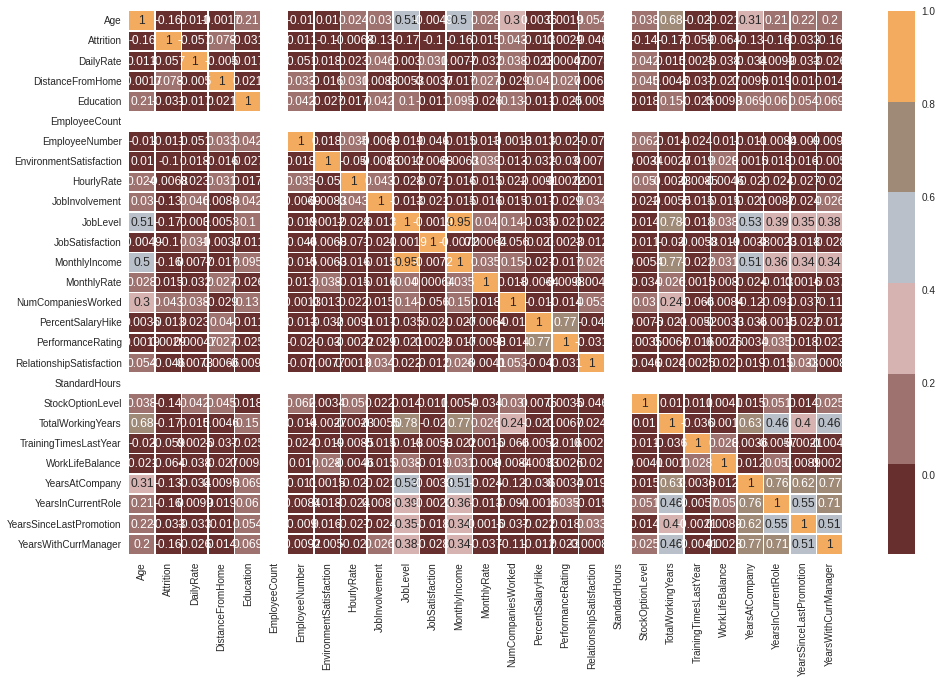

In [9]:
# Use Pearson correlation to find pairwise correlation of all variables
pearson = data.corr(method='pearson')
pearson
plt.figure(figsize=(16, 10))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap=cmap,
            annot=True,
            linewidth=0.5);

Observations:

Some variables relate to the target variable Attrition:
*   Environmental Satisfaction
*   Job Involvement
*   Job Level
*   Job Satisfaction
*   Monthly Income
*   Stock Option Level
*   Total Working Years
*   Years At Company
*   Years In Current Role
*   Years with Manager




Text(0.5, 1.0, 'Number of Attritions Reported by Education Level')

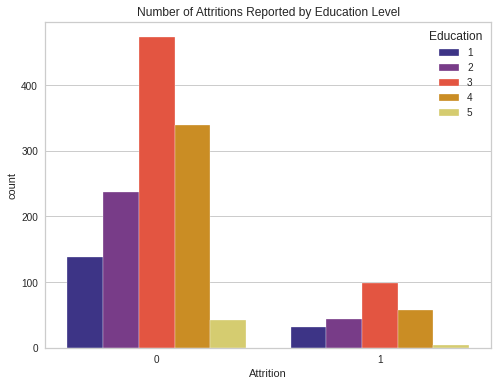

In [10]:
# catagorical variables
# count attrition/retention by edu level
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue=data.Education,data=data, palette = "CMRmap").set_title("Number of Attritions Reported by Education Level")

Text(0.5, 1.0, 'Number of Attritions Reported by Education Field')

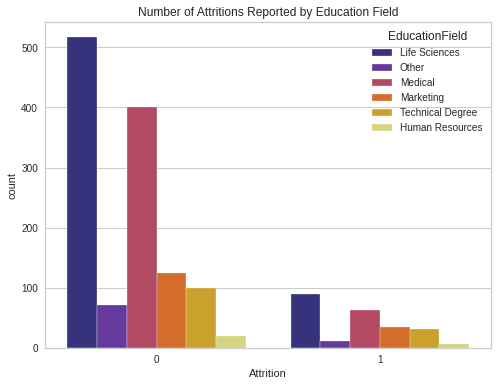

In [11]:
# count attrition/retention by edu field
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue=data.EducationField,data=data, palette = "CMRmap").set_title("Number of Attritions Reported by Education Field")

In [12]:
# percentage of attrition by education field
data[(data["Attrition"] == 1)].groupby(["EducationField"]).size() / data.groupby(["EducationField"]).size()


EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64

In [13]:
# count of attrition by education field
data[(data["Attrition"] == 1)].groupby(["EducationField"]).size()

EducationField
Human Resources      7
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
dtype: int64

In [14]:
# retention count by education field
data[(data["Attrition"] == 0)].groupby(["EducationField"]).size()

EducationField
Human Resources      20
Life Sciences       517
Marketing           124
Medical             401
Other                71
Technical Degree    100
dtype: int64

Observations:



*   Although technical, marketing, and human resource-educated personnel make up a small portion of the data set, the attrition ratios for personnel with education in these fields are much higher than others.



Text(0.5, 1.0, 'Number of Attritions Reported by Over Time')

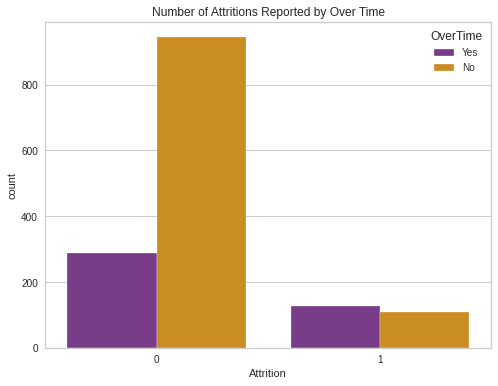

In [15]:
# count of attritions/rentions over time
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='OverTime',data=data, palette = 'CMRmap').set_title("Number of Attritions Reported by Over Time")


Observations:


*   Overtime employees have an attrition rate of about 31%.  This is a significant factor in overall employee attrition.




Text(0.5, 1.0, 'Number of Attritions Reported by Job Roles')

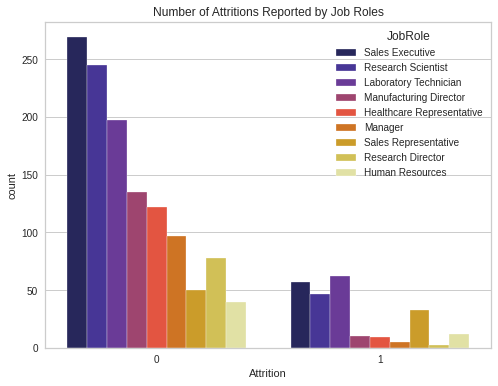

In [16]:
# count of attritions/retention by JobRole
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='JobRole',data=data, palette = 'CMRmap').set_title("Number of Attritions Reported by Job Roles")

In [17]:
# attrition rate over time
data[(data["Attrition"] == 1)].groupby(["OverTime","JobRole"]).size() / data.groupby(["OverTime","JobRole"]).size()

OverTime  JobRole                  
No        Healthcare Representative    0.074468
          Human Resources              0.179487
          Laboratory Technician        0.157360
          Manager                      0.013333
          Manufacturing Director       0.056604
          Research Director            0.017544
          Research Scientist           0.071795
          Sales Executive              0.112069
          Sales Representative         0.288136
Yes       Healthcare Representative    0.054054
          Human Resources              0.384615
          Laboratory Technician        0.500000
          Manager                      0.148148
          Manufacturing Director       0.102564
          Research Director            0.043478
          Research Scientist           0.340206
          Sales Executive              0.329787
          Sales Representative         0.666667
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Amount of Business Travel')

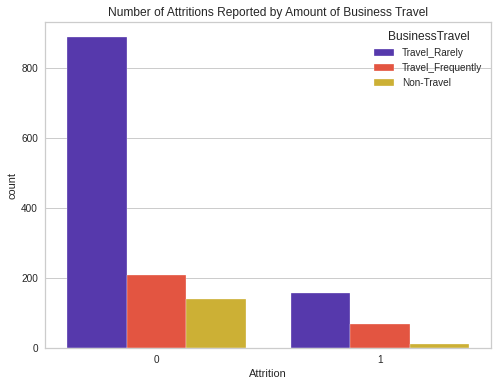

In [18]:
# count attrition/retention by travel
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='BusinessTravel',data=data, palette = 'CMRmap').set_title("Number of Attritions Reported by Amount of Business Travel")


In [19]:
# attrition rate for travel
(data[(data["Attrition"] == 1)].groupby(["BusinessTravel"]).size())/ data.groupby(["BusinessTravel"]).size()

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64

Observations:


*   Employees who travel frequently have significantly higher attrition rates than those who don't.  Their attrition rates are higher than all other categories combined (those who never travel and those who rarely travel).  




Text(0.5, 1.0, 'Number of Attritions Reported by Gender')

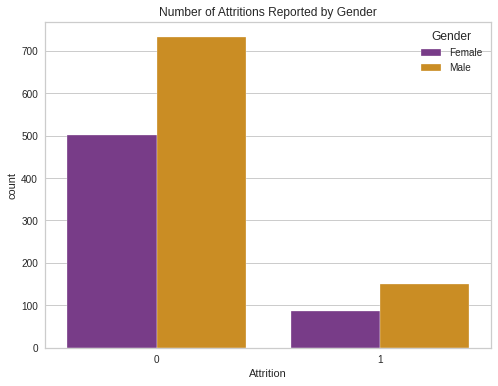

In [20]:
# count attrition/retention by gender
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='Gender',data=data, palette = 'CMRmap').set_title("Number of Attritions Reported by Gender")

In [21]:
# attrition rate by gender
(data[(data["Attrition"] == 1)].groupby(["Gender"]).size())/ (data[(data["Attrition"] == 0)].groupby(["Gender"]).size())

Gender
Female    0.173653
Male      0.204918
dtype: float64

In [22]:
# attrition counts by gender
data[(data["Attrition"] == 0)].groupby(["Gender"]).size() 

Gender
Female    501
Male      732
dtype: int64

In [23]:
# attrition counts by gender
data[(data["Attrition"] == 1)].groupby(["Gender"]).size() 

Gender
Female     87
Male      150
dtype: int64

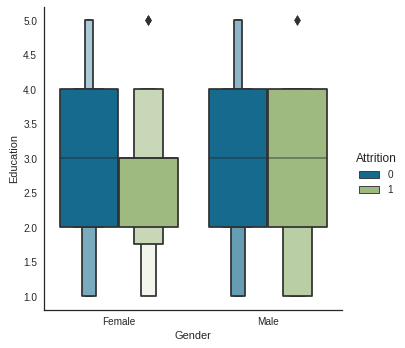

In [24]:
# attrition/retention distributions by gender & education level in role
with sns.axes_style(style='ticks'):
    g = sns.catplot("Gender", "Education", "Attrition", data=data, kind="boxen");


Observations:


*   250 employees left the company while nearly 1200 remained
*   List item



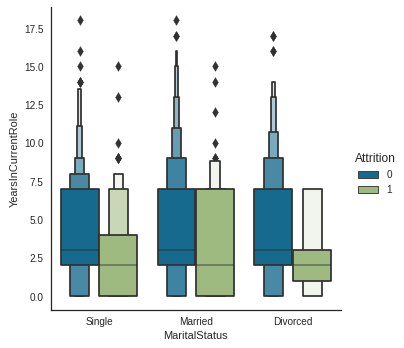

In [25]:
# attrition/retention distributions by marital status & years in role
with sns.axes_style(style='ticks'):
    g = sns.catplot("MaritalStatus", "YearsInCurrentRole", "Attrition", data=data, kind="boxen");


Text(0.5, 1.0, 'Number of Attritions Reported by Marital Status')

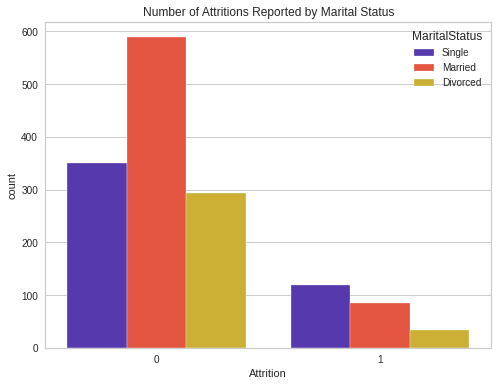

In [26]:
# count attrition/retention by marital status
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='MaritalStatus',data=data, palette = 'CMRmap').set_title("Number of Attritions Reported by Marital Status")


In [27]:

data[(data["Attrition"] == 1)].groupby(["JobRole"]).size() / data.groupby(["JobRole"]).size()

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64

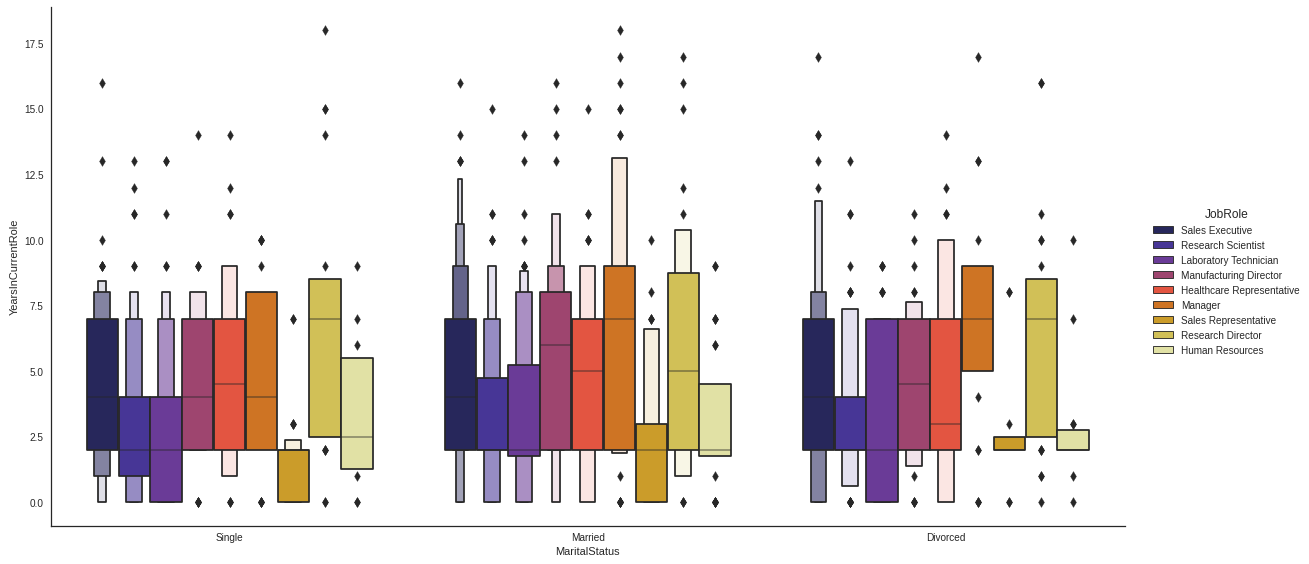

In [53]:
# attrition/retention distributions by marital status & years in role
# df.groupby(["marital","y"])["y"].count().unstack().plot(kind="bar")


with sns.axes_style(style='ticks'):
    g = sns.catplot("MaritalStatus", "YearsInCurrentRole", "JobRole", data=data, kind="boxen", height=8, aspect=2, palette='CMRmap');


##Preprocessing

The following steps are applied to preprocess the data:

*  Label encoding the categorical features
*  Scaling the features using the standard scaler
*  Creating a subset dataframe for dimensionality reduction

In [29]:
data2 = data.copy()

In [30]:
# We define our own function to target and encode all the categorical variables, replacing them with associated mean relation to fraud_reported. 
# This is because most models only take numerical variables.
def numericizer(data2, col, new_df_name):
  new_df_name = data2[[col,'Attrition']].groupby([col],as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
  data2[col] = data2[col].replace(new_df_name[col].values, 1 - new_df_name['Attrition'].values)
  new_df_name = None


In [31]:
test_correlation = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']

for i in test_correlation:
  try:
    numericizer(data2, i, "blah")
  except: 
    print(i)


data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.850431,1102,0.793722,1,2,0.853135,1,1,2,Female,94,3,2,0.825153,4,0.744681,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,0.750903,279,0.861602,8,1,0.853135,1,2,3,Male,61,2,2,0.839041,2,0.875186,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0.850431,1373,0.861602,2,2,0.865854,1,4,4,Male,92,2,1,0.760618,3,0.744681,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,0.750903,1392,0.861602,3,4,0.853135,1,5,4,Female,56,3,1,0.839041,3,0.875186,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0.850431,591,0.861602,2,1,0.864224,1,7,1,Male,40,3,1,0.760618,2,0.875186,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [32]:
# Changing binary representation of Gender, Overtime variables to 1/0
data2.Gender = data2.Gender.map({'Male':1, 'Female':0})
data2.OverTime = data2.OverTime.map({'Yes':1, 'No':0})

data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.850431,1102,0.793722,1,2,0.853135,1,1,2,0,94,3,2,0.825153,4,0.744681,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,0.750903,279,0.861602,8,1,0.853135,1,2,3,1,61,2,2,0.839041,2,0.875186,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0.850431,1373,0.861602,2,2,0.865854,1,4,4,1,92,2,1,0.760618,3,0.744681,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,0.750903,1392,0.861602,3,4,0.853135,1,5,4,0,56,3,1,0.839041,3,0.875186,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0.850431,591,0.861602,2,1,0.864224,1,7,1,1,40,3,1,0.760618,2,0.875186,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


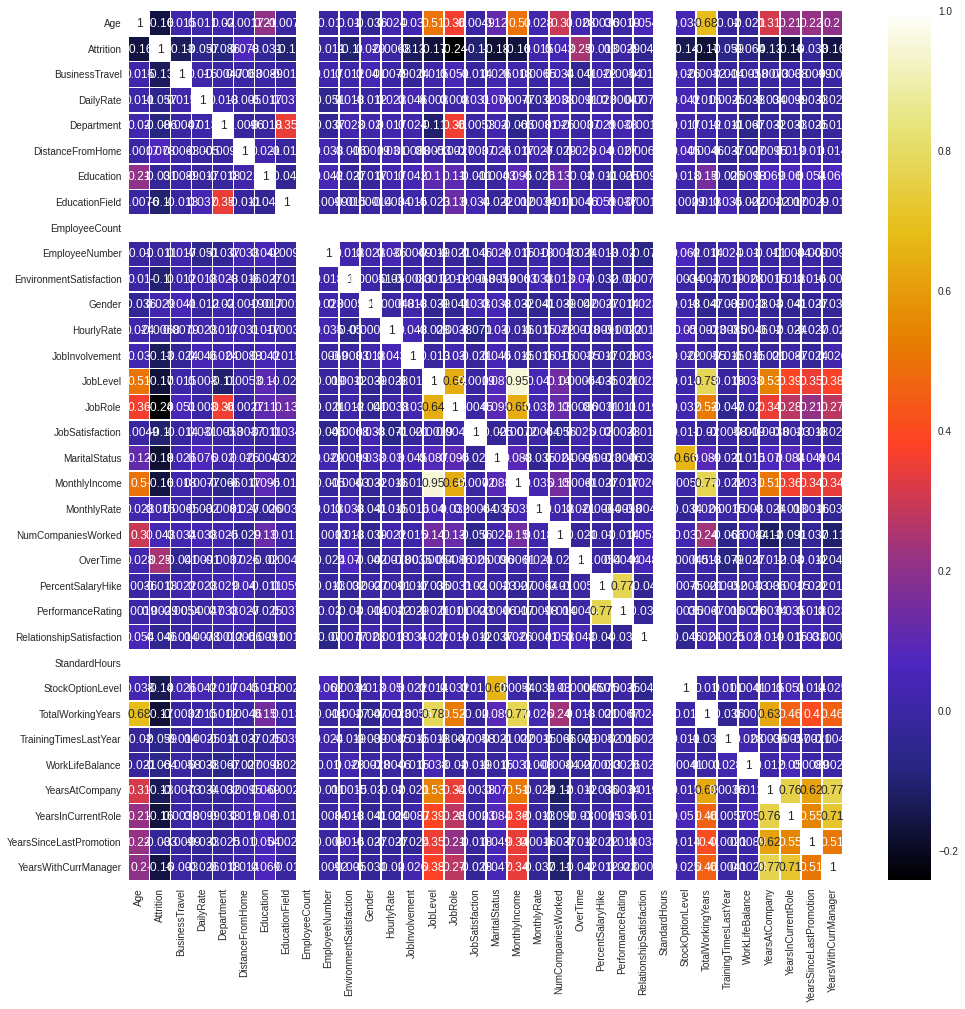

In [54]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = data2.corr(method='pearson')
pearson
plt.figure(figsize=(16, 16))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='CMRmap',
            annot=True,
            linewidth=0.5);

Observations:

Transformed catagories show a relationship with the target variable, Attrition, especially the following:
*   OverTime
*   JobRole



##Feature Selection

The heatmap above shows how related the variables are to Attrition.  For our model, we will select features that have an absolure correlation value greater than 0.1.

In [34]:
# Picking the features that have absolute correlation value greater than 0.1 
data3 = data2[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]


##Modeling

Because Attrition is a binary feature and we are using multiple features to train the model,  we implent logistic regression with the 'newton-cg' solver to classify our data.   

In [35]:
# Separating dataset into x & y, where y is the target variable
x = data3.drop('Attrition', axis = 1)
y = data3['Attrition']


# Train test split using industry standard 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (1176, 16) (1176,)
Test set: (294, 16) (294,)


In [36]:
# build logistic regression model to fit training model
LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(x_train,y_train)
LR


LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')

In [37]:
# predict
yhat_train = LR.predict(x_train)
yhat_test = LR.predict(x_test)


##Model Accuracy

In [38]:
# create confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.CMRmap):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


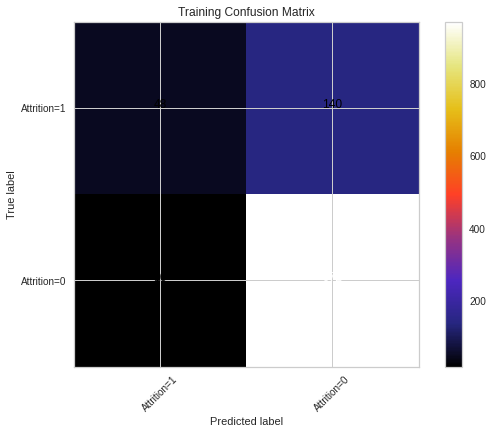

In [39]:
# compute confusion matrix for training data
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,0])
np.set_printoptions(precision=2)


# plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'], normalize= False,  title='Training Confusion Matrix')


In [40]:
# scoring the training model
print (classification_report(y_train, yhat_train))


              precision    recall  f1-score   support

           0       0.87      0.98      0.93       988
           1       0.75      0.26      0.38       188

    accuracy                           0.87      1176
   macro avg       0.81      0.62      0.65      1176
weighted avg       0.85      0.87      0.84      1176



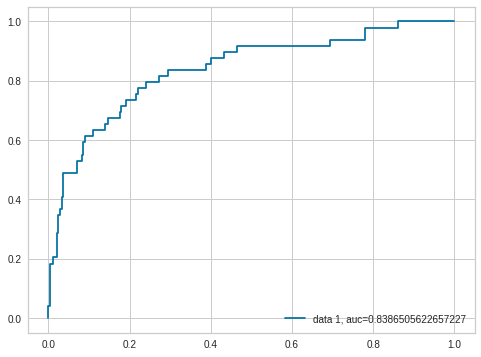

In [41]:
# plot ROC curve and calculate AUC score to evaluate sensitivity and specificity of model as classifier
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [42]:
# cross validation scores
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, x_test, y_test, cv=10)

array([0.8 , 0.87, 0.87, 0.83, 0.86, 0.83, 0.83, 0.83, 0.79, 0.79])

##Logistic Regression Analysis

In [43]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.352552
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.202     
Dependent Variable:   Attrition          AIC:                1068.5037 
Date:                 2022-12-11 19:15   BIC:                1153.1920 
No. Observations:     1470               Log-Likelihood:     -518.25   
Df Model:             15                 LL-Null:            -649.29   
Df Residuals:         1454               LLR p-value:        4.0102e-47
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Age                     -0.0109   0.0119 -0.9159 0.3597 -0.0342

In [44]:
# Reselect features that have a p-value less than 0.05
data4 = data3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]


In [45]:
# Separating dataset into x & y, where y is the target variable
x1 = data4.drop('Attrition', axis = 1)
y1 = data4['Attrition']

In [46]:
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.356714
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.192     
Dependent Variable:   Attrition          AIC:                1068.7397 
Date:                 2022-12-11 19:15   BIC:                1121.6698 
No. Observations:     1470               Log-Likelihood:     -524.37   
Df Model:             9                  LL-Null:            -649.29   
Df Residuals:         1460               LLR p-value:        1.0767e-48
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.3565   0.9490  6.6983 0.0000  4.4966

In [47]:
# Continue to Reselect features that have a p-value less than 0.05
data5 = data3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager']]


In [48]:
# Separating dataset into x & y, where y is the target variable
x1 = data5.drop('Attrition', axis = 1)
y1 = data5['Attrition']


In [49]:
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.357260
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.191     
Dependent Variable:   Attrition          AIC:                1068.3445 
Date:                 2022-12-11 19:15   BIC:                1115.9817 
No. Observations:     1470               Log-Likelihood:     -525.17   
Df Model:             8                  LL-Null:            -649.29   
Df Residuals:         1461               LLR p-value:        4.0707e-49
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.2164   0.9411  6.6056 0.0000  4.3719

In [50]:
# Continue to Reselect features that have a p-value less than 0.05
data6 = data3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel']]


In [51]:
# Separating dataset into x & y, where y is the target variable
x1 = data6.drop('Attrition', axis = 1)
y1 = data6['Attrition']

In [52]:
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.363654
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.177     
Dependent Variable:   Attrition          AIC:                1083.1425 
Date:                 2022-12-11 19:15   BIC:                1120.1936 
No. Observations:     1470               Log-Likelihood:     -534.57   
Df Model:             6                  LL-Null:            -649.29   
Df Residuals:         1463               LLR p-value:        1.0081e-46
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.7398   0.9304  7.2437 0.0000  4.9162

Observations:


*   model variables are statistically significant

*   model indicates that of the variables considered, the following are most important when it comes to employee attrition: ***Education Field, Environment  Satisfaction, Job Involvement, Job Role, Job Satisfaction, Over Time, and Stock Option Level***

*   Environment Satisfaction, Job Involvement, Job Role, Job Satisfaction, Stock Option Level are all negatively correlated with attrition

  `higher employee satisfaction means the employee is less likely to attrit `

*  Among variables with negative correlation to Attrition, StockOptionLevel has the greatest impact

  `employees with stock options are less likely to attrit`

*  Among variables with positive correlation to Attrition OverTime has the greatest impact on employee attrition

  `employees with overtime are more likely to attrit`


